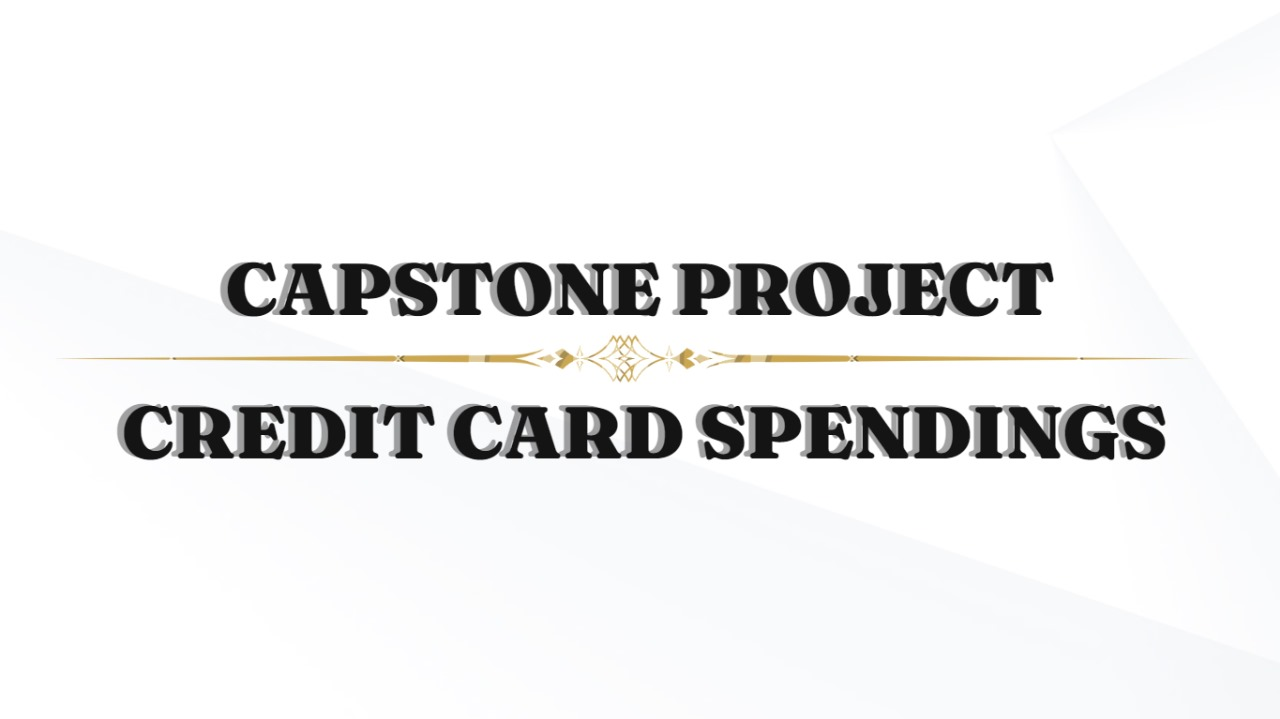

# CREDIT CARD SPENDINGS IN INDIA

**1.Distribution of Card Types in India.**

**2.Finding spending with respect to Expenditure.**

**3.Finding the expenses based on the cities.**

**4.Who spends more(Male or Female)?**

**5.Relation between card type and type of expenses.**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# ****Distribution of Card Types in India****

In [3]:
spend=pd.read_csv('Spendings.csv')
spend

,City,Card Type,Exp Type,Gender,Amount
0,"Greater Mumbai, India",Gold,Entertainment,M,986379
1,"Delhi, India",Signature,Entertainment,M,809623
2,"Greater Mumbai, India",Platinum,Entertainment,M,735566
3,"Ahmedabad, India",Gold,Entertainment,M,668568
4,"Greater Mumbai, India",Platinum,Entertainment,M,647116
...,...,...,...,...,...
694,"Ahmedabad, India",Gold,Entertainment,F,295163
695,"Bengaluru, India",Silver,Entertainment,F,158649
696,"Delhi, India",Platinum,Entertainment,F,120780
697,"Bengaluru, India",Signature,Entertainment,F,72366


In [5]:
# display top 10 row from dataset

In [6]:
spend.head(10)

,City,Card Type,Exp Type,Gender,Amount
0,"Greater Mumbai, India",Gold,Entertainment,M,986379
1,"Delhi, India",Signature,Entertainment,M,809623
2,"Greater Mumbai, India",Platinum,Entertainment,M,735566
3,"Ahmedabad, India",Gold,Entertainment,M,668568
4,"Greater Mumbai, India",Platinum,Entertainment,M,647116
5,"Delhi, India",Silver,Entertainment,M,622170
6,"Greater Mumbai, India",Silver,Entertainment,M,467014
7,"Bengaluru, India",Platinum,Entertainment,M,434427
8,"Greater Mumbai, India",Signature,Entertainment,M,421878
9,"Delhi, India",Signature,Entertainment,M,366102


In [7]:
#Display last 10 row from dataset

In [8]:
spend.tail(10)

,City,Card Type,Exp Type,Gender,Amount
689,"Greater Mumbai, India",Signature,Entertainment,F,59926
690,"Bengaluru, India",Platinum,Entertainment,F,22964
691,"Greater Mumbai, India",Platinum,Entertainment,F,48570
692,"Bengaluru, India",Silver,Entertainment,F,52970
693,"Bengaluru, India",Platinum,Entertainment,F,13160
694,"Ahmedabad, India",Gold,Entertainment,F,295163
695,"Bengaluru, India",Silver,Entertainment,F,158649
696,"Delhi, India",Platinum,Entertainment,F,120780
697,"Bengaluru, India",Signature,Entertainment,F,72366
698,"Greater Mumbai, India",Silver,Entertainment,F,281805


In [10]:
#find shape of the dataset

In [11]:
spend.shape

(699, 5)

In [13]:
print('number of rows in datset ',spend.shape[0])
print('number of column in datset ',spend.shape[1])

number of rows in datset  699
number of column in datset  5


In [14]:
#Check null value in dataset

In [16]:
spend.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    0
697    0
698    0
Length: 699, dtype: int64

<Axes: >

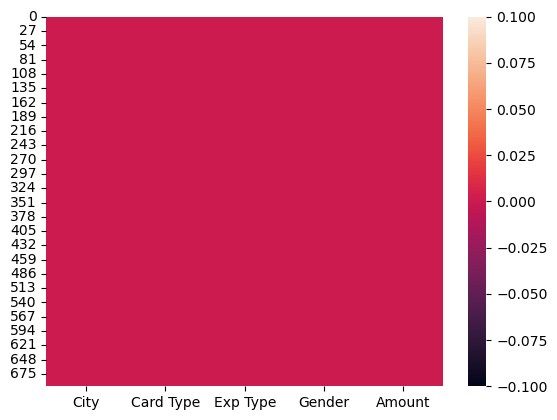

In [19]:
sb.heatmap(spend.isnull())

In [20]:
#CHECK DUPLICATE DATA IN DATASET

In [22]:
dup = spend.duplicated().any()

In [24]:
print("Are there any duplicate value ",dup)

Are there any duplicate value  False


# ****Find spending with respect to Expenditure****

In [43]:
a=spend['Exp Type'].value_counts()
a

Exp Type
Bills            413
Food             177
Entertainment     47
Fuel              32
Grocery           30
Name: count, dtype: int64

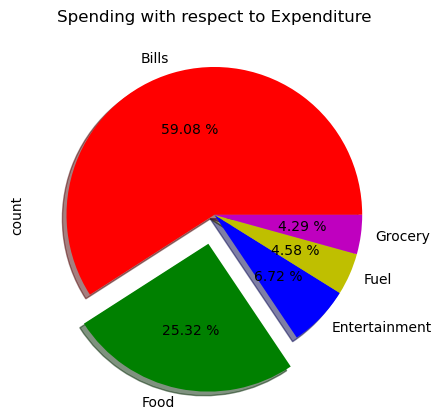

In [63]:
myexplode=[0, 0.2, 0, 0,0]
a.plot(kind='pie',autopct='%.2f %%',colors=['r','g','b','y','m'],explode = myexplode,shadow='True')
plt.title('Spending with respect to Expenditure')
plt.show()

In [6]:
spend.describe()

,Amount
count,699.000000
mean,369295.098712
std,280910.618215
min,2138.000000
25%,155867.000000
50%,269712.000000
75%,568602.500000
max,998077.000000


In [57]:
spend['Card Type'].value_counts()

Card Type
Signature    189
Platinum     177
Gold         176
Silver       157
Name: count, dtype: int64

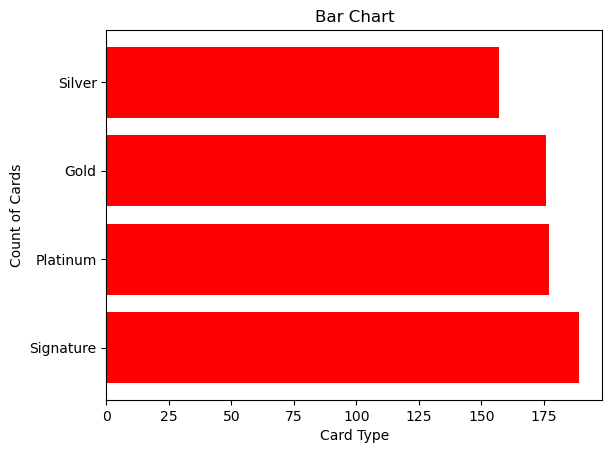

In [67]:
card_counts=spend['Card Type'].value_counts()
plt.barh(card_counts.index,card_counts.values,color='red')
 
plt.title("Bar Chart")
 
plt.xlabel('Card Type')
plt.ylabel('Count of Cards')

plt.show()

# ****Finding the expenses based on the cities****

In [60]:
amt=spend.groupby(by='City').Amount.mean()
amt

City
Ahmedabad, India         379769.836364
Bengaluru, India         339318.514286
Delhi, India             368543.741176
Greater Mumbai, India    388582.407407
Name: Amount, dtype: float64

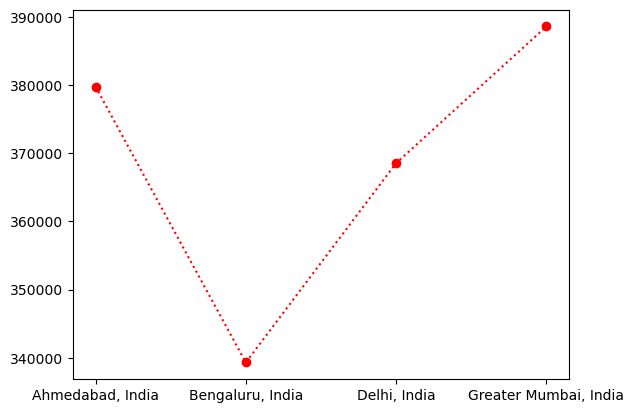

In [62]:
plt.plot(amt,'o:r')

# ****Who spends more(Male or Female)?****

In [14]:
spend['Gender'].value_counts()

Gender
F    615
M     84
Name: count, dtype: int64

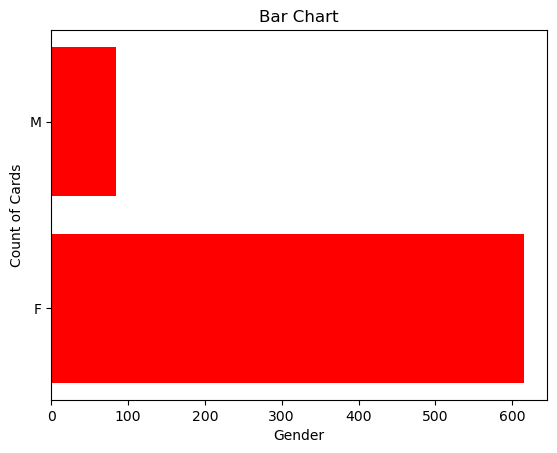

In [82]:
person_counts=spend['Gender'].value_counts()
plt.barh(person_counts.index,person_counts.values,color='red')
 
plt.title("Bar Chart")
 
plt.xlabel('Gender')
plt.ylabel('Count of Cards')

plt.show()

# ****Relation between card type and type of expenses****

In [78]:
d=spend.groupby('Exp Type')['Card Type'].value_counts()    
d
single_group = pd.DataFrame(d)
single_group

count
Exp Type      Card Type       
Bills         Signature    118
              Platinum     106
              Gold         101
              Silver        88
Entertainment Gold          16
              Platinum      14
              Signature     11
              Silver         6
Food          Signature     52
              Silver        48
              Platinum      39
              Gold          38
Fuel          Gold          11
              Silver         9
              Platinum       8
              Signature      4
Grocery       Gold          10
              Platinum      10
              Silver         6
              Signature      4

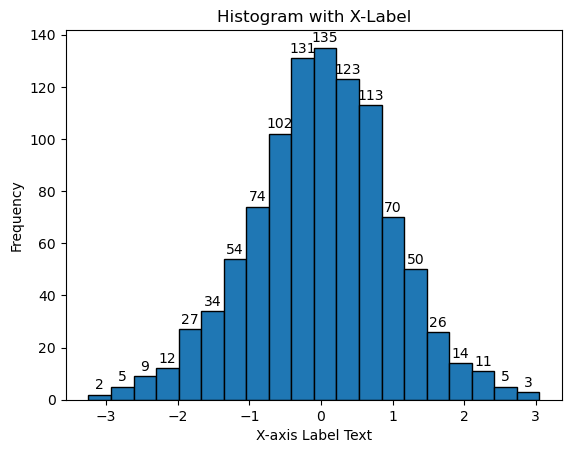

In [98]:

# Create the histogram
counts, bins, patches = plt.hist(d, bins=20, edgecolor='black')  # Adjust 'bins' as needed
for x, height in zip(bins[:-1], counts):
    plt.text(x + (bins[1] - bins[0]) / 2, height + 1, f"{int(height)}", ha='center', va='bottom')
# Add the x-label
plt.xlabel('X-axis Label Text')  # Replace with your desired label

# Customize other aspects of the plot (optional)
plt.ylabel('Frequency')
plt.title('Histogram with X-Label')
#plt.grid(True)

# Display the plot
plt.show()